## **Will the machine fail? What causes machine failures?**

Using a synthetic dataset that reflects real predictive maintenance encountered in the industries, this machine learning model predicts whether a machine failure will occur (1) or not (0).

Two sets of training and testing were done: 
  1. Predicting general machine failure
  2. Predicting specific machine failure
*   Tool wear failure (TWF)
*   Heat dissipation failure (HDF)
*   Power failure (PWF)
*   Overstrain failure (OSF)
*   Random failures (RNF)

**Data Source:** Matzka, Stephan (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset]. Irvine, CA: University of California, School of Information and Computer Science.

**Relevant Papers:** Stephan Matzka, 'Explainable Artificial Intelligence for Predictive Maintenance Applications', Third International Conference on Artificial Intelligence for Industries (AI4I 2020), 2020 (in press)

## Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#warnings.filterwarnings("ignore", category=DataConversionWarning)

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = data_dir = '/content/drive/My Drive/Colab Notebooks/AI_HW1/'

In [4]:
df_data = pd.read_csv(data_dir+'ai4i2020.csv')
dummy = df_data
dummy.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
print(df_data.shape)

(10000, 14)


In [6]:
df_data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

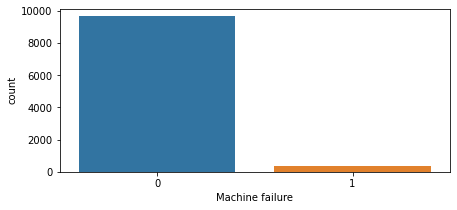

In [7]:
import seaborn as sns
plt.figure(figsize=(7,3))
sns.countplot(df_data['Machine failure'],label="Count")
plt.show()

In [8]:
df_data.groupby('Machine failure').size()

Machine failure
0    9661
1     339
dtype: int64

In [9]:
df_data.groupby('Machine failure').size()[0]/df_data.groupby('Machine failure').size().sum()

0.9661

In [10]:
num=(df_data.groupby('Machine failure').size()/df_data.groupby('Machine failure').size().sum())**2
#print("Population per class: {}\n".format(df_state))
print("Proportion Chance Criterion = {}%".format(100*num.sum()))
print("1.25*Proportion Chance Criterion = {}%".format(1.25*100*num.sum()))

Proportion Chance Criterion = 93.44984199999999%
1.25*Proportion Chance Criterion = 116.81230249999999%


# Step 1: Look at the missing values

In [11]:
df_data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [12]:
df_data.values

array([[1, 'M14860', 'M', ..., 0, 0, 0],
       [2, 'L47181', 'L', ..., 0, 0, 0],
       [3, 'L47182', 'L', ..., 0, 0, 0],
       ...,
       [9998, 'M24857', 'M', ..., 0, 0, 0],
       [9999, 'H39412', 'H', ..., 0, 0, 0],
       [10000, 'M24859', 'M', ..., 0, 0, 0]], dtype=object)

## Steps 2 and 3. Remove or Imput the missing values

In [13]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(df_data)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [14]:
X_clean.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [15]:
X_clean.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [16]:
X_clean = X_clean.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)  # REMOVE THE TARGET VARIABLE
X_clean.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,M14860,M,298.1,308.6,1551,42.8,0
1,2,L47181,L,298.2,308.7,1408,46.3,3
2,3,L47182,L,298.1,308.5,1498,49.4,5
3,4,L47183,L,298.2,308.6,1433,39.5,7
4,5,L47184,L,298.2,308.7,1408,40.0,9


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

## Step 4. Handle Categorical Data, for simplicity let's just One Hat Encode all the categorical values

In [17]:
XX=pd.get_dummies(X_clean)

In [18]:
XX.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Product ID_H29424,Product ID_H29425,Product ID_H29432,Product ID_H29434,Product ID_H29441,Product ID_H29452,Product ID_H29457,Product ID_H29462,Product ID_H29466,Product ID_H29481,Product ID_H29494,Product ID_H29500,Product ID_H29522,Product ID_H29525,Product ID_H29550,Product ID_H29552,Product ID_H29557,Product ID_H29560,Product ID_H29569,Product ID_H29571,Product ID_H29580,Product ID_H29581,Product ID_H29595,Product ID_H29606,Product ID_H29607,Product ID_H29610,Product ID_H29626,Product ID_H29635,Product ID_H29680,Product ID_H29682,Product ID_H29684,Product ID_H29691,Product ID_H29702,Product ID_H29707,...,Product ID_M24739,Product ID_M24748,Product ID_M24753,Product ID_M24756,Product ID_M24761,Product ID_M24763,Product ID_M24765,Product ID_M24766,Product ID_M24767,Product ID_M24771,Product ID_M24775,Product ID_M24776,Product ID_M24777,Product ID_M24781,Product ID_M24783,Product ID_M24784,Product ID_M24785,Product ID_M24786,Product ID_M24788,Product ID_M24800,Product ID_M24803,Product ID_M24807,Product ID_M24809,Product ID_M24814,Product ID_M24815,Product ID_M24816,Product ID_M24818,Product ID_M24827,Product ID_M24835,Product ID_M24842,Product ID_M24846,Product ID_M24847,Product ID_M24849,Product ID_M24851,Product ID_M24855,Product ID_M24857,Product ID_M24859,Type_H,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
X_clean.shape

(10000, 8)

In [20]:
XX.shape

(10000, 10009)

In [21]:
XX_column_names =XX.columns

# Step 5: Apply Scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
XX = sscaler.fit_transform(X_clean.drop(['UDI', 'Product ID','Type'], axis=1).astype(np.float)) #You will loss the column names

In [23]:
XX

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [24]:
XX_df = pd.DataFrame(data = XX,columns = X_clean.drop(['UDI', 'Product ID','Type'], axis=1).columns) # Return the column names
XX_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573


# Step 6:  Now let's run an automated Machine Learning to the above processed data

Below we combine the notebook codes previously shared into a single running code to create an **Automated ML**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Number_trials=20

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        neighbors_settings = range(1,20)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model 
            clf.fit(X_train, y_train)    
            acc_train.append(clf.score(X_train, y_train))
            acc_test.append(clf.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time]

def train_logistic(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                lr = LogisticRegression(C=alpha_run, penalty=reg, solver='liblinear').fit(X_train, y_train)
            if reg == 'l2':
                lr = LogisticRegression(C=alpha_run, penalty=reg, dual=False).fit(X_train, y_train)
            
            
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            coefs=lr.coef_ 
            weighted_coefs.append(coefs) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    #print(mean_coefs) 
    score = np.mean(score_test, axis=0)
    
    #Plot the weight of the parameters 
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs[0,:]))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
     
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Logistic ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor, run_time]

def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge', dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.coef_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs[0,:]))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor,run_time]

def train_RF(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = RandomForestClassifier(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Random Forest', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_GBM(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = GradientBoostingClassifier(n_estimators=100,max_depth=3, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Gradient Boosting Method', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]



In [26]:
#df_data = df_data.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
df_MF = df_data.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
df_TWF = df_data.drop(['Machine failure', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
df_HDF = df_data.drop(['Machine failure', 'TWF', 'PWF', 'OSF', 'RNF'], axis=1)
df_PWF = df_data.drop(['Machine failure', 'TWF', 'HDF', 'OSF', 'RNF'], axis=1)
df_OSF = df_data.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'RNF'], axis=1)
df_RNF = df_data.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF'], axis=1)

#df_RNF.head()

['kNN', 0.9718599999999998, 'N_Neighbor = 5', 'NA', 150.50935220718384]
150.50935220718384 seconds
['Logistic (l2)', 0.9699, 'C = 100', 'Torque [Nm]', 16.3646183013916]
16.3646183013916 seconds
['Logistic (l1)', 0.96998, 'C = 1.5', 'Torque [Nm]', 59.13896346092224]
59.13896346092224 seconds
['Linear SVM (l2)', 0.9681000000000001, 'C = 100', 'Torque [Nm]', 45.70512080192566]
45.70512080192566 seconds
['Linear SVM (l1)', 0.96706, 'C = 5000', 'Rotational speed [rpm]', 128.51935648918152]
128.51935648918152 seconds
['Random Forest', 0.9856000000000001, 'Max_features = 0.8', 'Torque [Nm]', 135.14281702041626]
135.14281702041626 seconds
['Gradient Boosting Method', 0.9829800000000001, 'Max_features = 0.8', 'Torque [Nm]', 66.63399505615234]
135.14281702041626 seconds


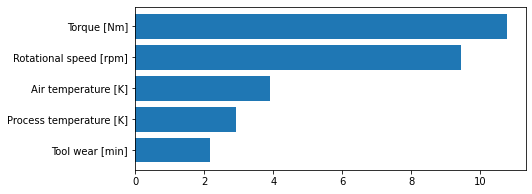

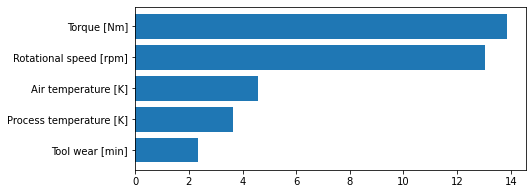

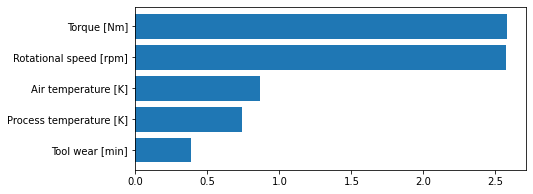

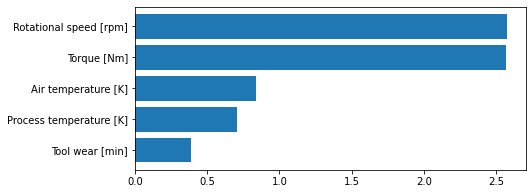

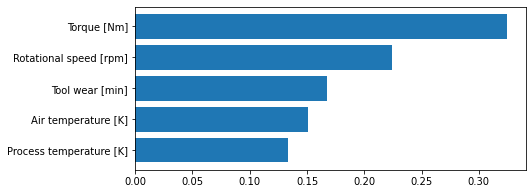

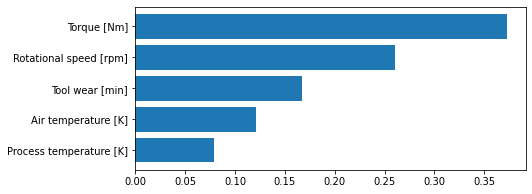

In [27]:
#@title
X = XX_df
y = df_MF['Machine failure']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])

start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])

In [28]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
df2.loc[6] = g

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable,Run Time
0,kNN,0.97186,N_Neighbor = 5,NA,150.509352
1,Logistic (l2),0.96990,C = 100,Torque [Nm],16.364618
2,Logistic (l1),0.96998,C = 1.5,Torque [Nm],59.138963
3,Linear SVM (l2),0.96810,C = 100,Torque [Nm],45.705121
4,Linear SVM (l1),0.96706,C = 5000,Rotational speed [rpm],128.519356
5,Random Forest,0.98560,Max_features = 0.8,Torque [Nm],135.142817
6,Gradient Boosting Method,0.98298,Max_features = 0.8,Torque [Nm],66.633995


['kNN', 0.9952799999999999, 'N_Neighbor = 6', 'NA', 149.5438141822815]
149.5438141822815 seconds
['Logistic (l2)', 0.9952799999999999, 'C = 1e-08', 'Tool wear [min]', 15.954586744308472]
15.954586744308472 seconds
['Logistic (l1)', 0.9952799999999999, 'C = 1e-08', 'Tool wear [min]', 63.62796926498413]
63.62796926498413 seconds
['Linear SVM (l2)', 0.9952799999999999, 'C = 1e-08', 'Tool wear [min]', 17.99391531944275]
17.99391531944275 seconds
['Linear SVM (l1)', 0.9952799999999999, 'C = 1e-08', 'Tool wear [min]', 87.25386834144592]
87.25386834144592 seconds
['Random Forest', 0.99526, 'Max_features = 0.1', 'Tool wear [min]', 78.3561806678772]
78.3561806678772 seconds
['Gradient Boosting Method', 0.9945400000000001, 'Max_features = 0.1', 'Tool wear [min]', 65.66505885124207]
78.3561806678772 seconds


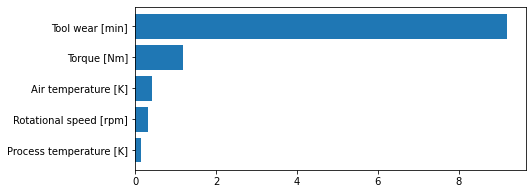

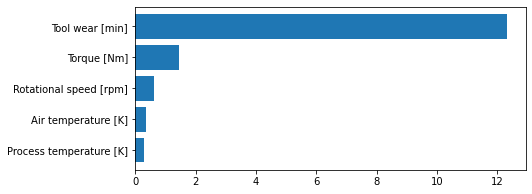

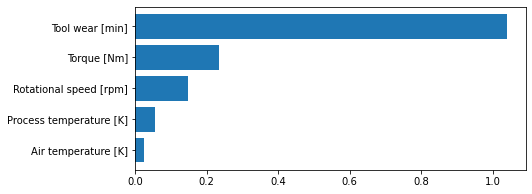

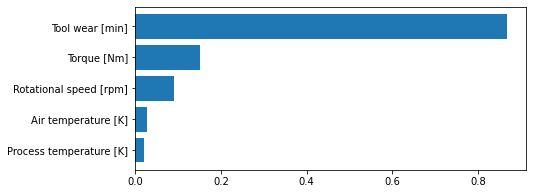

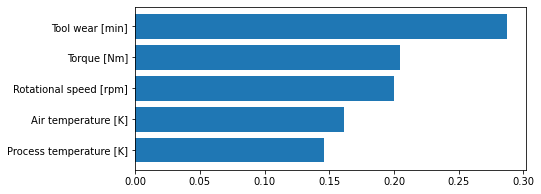

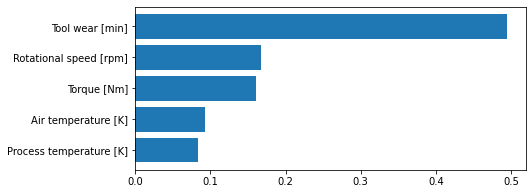

In [29]:
X = XX_df
y = df_TWF['TWF']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])


start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])

In [30]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable for TWF', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
df2.loc[6] = g

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable for TWF,Run Time
0,kNN,0.99528,N_Neighbor = 6,NA,149.543814
1,Logistic (l2),0.99528,C = 1e-08,Tool wear [min],15.954587
2,Logistic (l1),0.99528,C = 1e-08,Tool wear [min],63.627969
3,Linear SVM (l2),0.99528,C = 1e-08,Tool wear [min],17.993915
4,Linear SVM (l1),0.99528,C = 1e-08,Tool wear [min],87.253868
5,Random Forest,0.99526,Max_features = 0.1,Tool wear [min],78.356181
6,Gradient Boosting Method,0.99454,Max_features = 0.1,Tool wear [min],65.665059


['kNN', 0.9893999999999998, 'N_Neighbor = 7', 'NA', 149.4338836669922]
149.4338836669922 seconds
['Logistic (l2)', 0.9932200000000002, 'C = 300', 'Rotational speed [rpm]', 17.34931969642639]
17.34931969642639 seconds
['Logistic (l1)', 0.9932400000000001, 'C = 5', 'Rotational speed [rpm]', 110.4586386680603]
110.4586386680603 seconds
['Linear SVM (l2)', 0.9931800000000001, 'C = 100', 'Rotational speed [rpm]', 9.640884160995483]
9.640884160995483 seconds
['Linear SVM (l1)', 0.9927800000000003, 'C = 100', 'Rotational speed [rpm]', 72.2405092716217]
72.2405092716217 seconds
['Random Forest', 0.9984399999999999, 'Max_features = 0.8', 'Air temperature [K]', 60.98717260360718]
60.98717260360718 seconds
['Gradient Boosting Method', 0.9976399999999999, 'Max_features = 0.7', 'Air temperature [K]', 66.1089243888855]
60.98717260360718 seconds


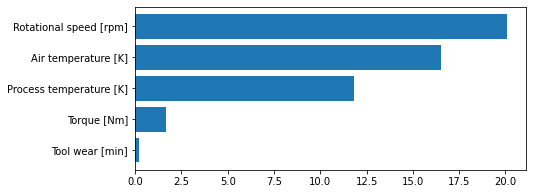

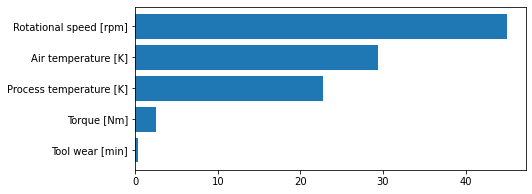

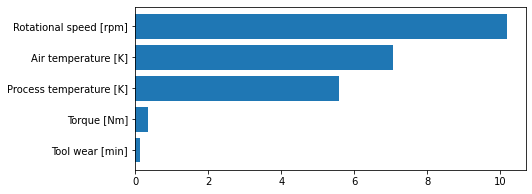

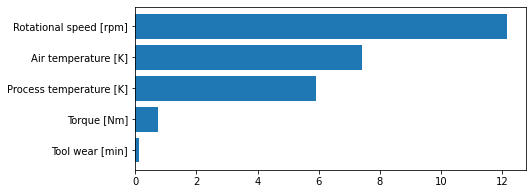

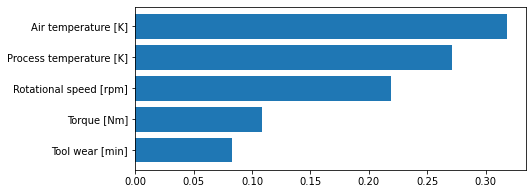

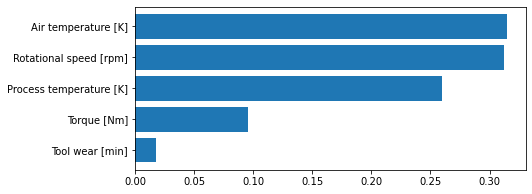

In [31]:
X = XX_df
y = df_HDF['HDF']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])


start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])

In [32]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable for HDF', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
df2.loc[6] = g

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable for HDF,Run Time
0,kNN,0.98940,N_Neighbor = 7,NA,149.433884
1,Logistic (l2),0.99322,C = 300,Rotational speed [rpm],17.349320
2,Logistic (l1),0.99324,C = 5,Rotational speed [rpm],110.458639
3,Linear SVM (l2),0.99318,C = 100,Rotational speed [rpm],9.640884
4,Linear SVM (l1),0.99278,C = 100,Rotational speed [rpm],72.240509
5,Random Forest,0.99844,Max_features = 0.8,Air temperature [K],60.987173
6,Gradient Boosting Method,0.99764,Max_features = 0.7,Air temperature [K],66.108924


['kNN', 0.9919400000000002, 'N_Neighbor = 3', 'NA', 148.77545928955078]
148.77545928955078 seconds
['Logistic (l2)', 0.9976200000000001, 'C = 5000', 'Rotational speed [rpm]', 15.409365177154541]
15.409365177154541 seconds
['Logistic (l1)', 0.99766, 'C = 300', 'Rotational speed [rpm]', 127.22212743759155]
127.22212743759155 seconds
['Linear SVM (l2)', 0.99696, 'C = 100', 'Rotational speed [rpm]', 9.709476709365845]
9.709476709365845 seconds
['Linear SVM (l1)', 0.99508, 'C = 300', 'Rotational speed [rpm]', 90.69940686225891]
90.69940686225891 seconds
['Random Forest', 0.99746, 'Max_features = 0.8', 'Torque [Nm]', 99.42971920967102]
99.42971920967102 seconds
['Gradient Boosting Method', 0.9970599999999997, 'Max_features = 0.8', 'Torque [Nm]', 66.21745824813843]
99.42971920967102 seconds


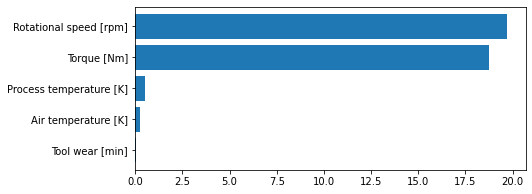

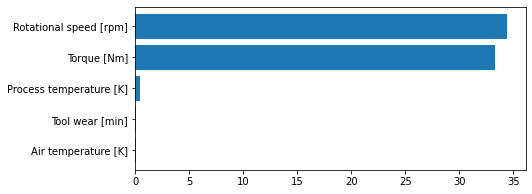

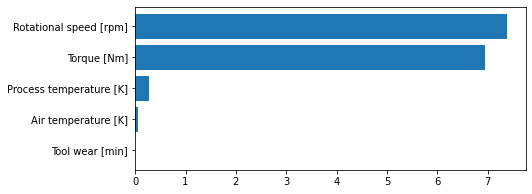

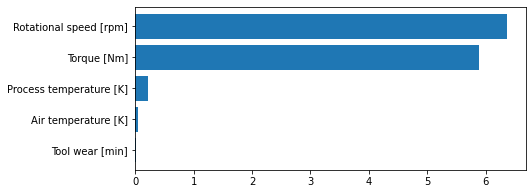

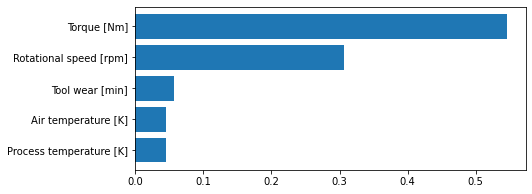

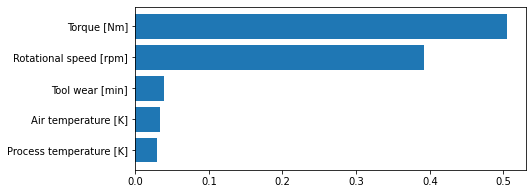

In [33]:
X = XX_df
y = df_PWF['PWF']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])


start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])

In [34]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable for PWF', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
df2.loc[6] = g

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable for PWF,Run Time
0,kNN,0.99194,N_Neighbor = 3,NA,148.775459
1,Logistic (l2),0.99762,C = 5000,Rotational speed [rpm],15.409365
2,Logistic (l1),0.99766,C = 300,Rotational speed [rpm],127.222127
3,Linear SVM (l2),0.99696,C = 100,Rotational speed [rpm],9.709477
4,Linear SVM (l1),0.99508,C = 300,Rotational speed [rpm],90.699407
5,Random Forest,0.99746,Max_features = 0.8,Torque [Nm],99.429719
6,Gradient Boosting Method,0.99706,Max_features = 0.8,Torque [Nm],66.217458


['kNN', 0.9936400000000001, 'N_Neighbor = 3', 'NA', 149.48757696151733]
149.48757696151733 seconds
['Logistic (l2)', 0.9949600000000001, 'C = 5000', 'Torque [Nm]', 17.380180597305298]
17.380180597305298 seconds
['Logistic (l1)', 0.9949600000000001, 'C = 100', 'Torque [Nm]', 196.20931220054626]
196.20931220054626 seconds
['Linear SVM (l2)', 0.9945600000000002, 'C = 100', 'Torque [Nm]', 7.637668132781982]
7.637668132781982 seconds
['Linear SVM (l1)', 0.9940200000000001, 'C = 0.75', 'Torque [Nm]', 65.90546989440918]
65.90546989440918 seconds
['Random Forest', 0.9958200000000001, 'Max_features = 0.8', 'Tool wear [min]', 79.9600293636322]
79.9600293636322 seconds
['Gradient Boosting Method', 0.9949999999999999, 'Max_features = 0.8', 'Tool wear [min]', 67.59123873710632]
79.9600293636322 seconds


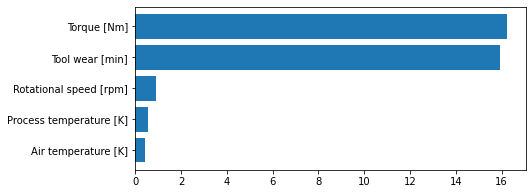

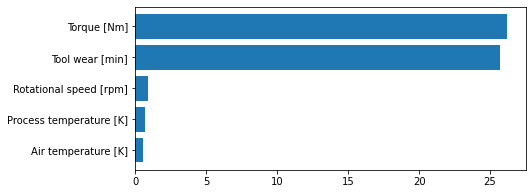

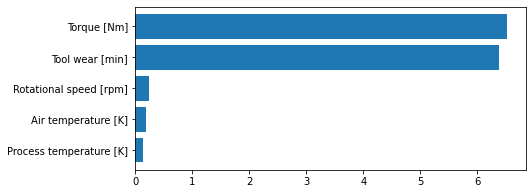

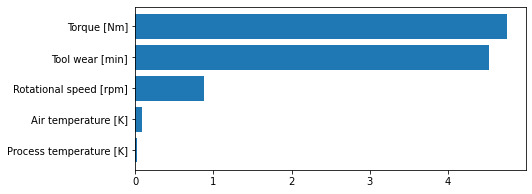

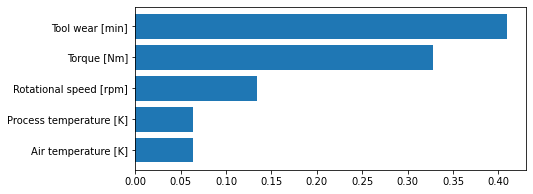

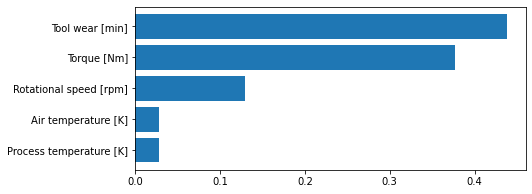

In [35]:
X = XX_df
y = df_OSF['OSF']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])


start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])

In [36]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable for OSF', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
df2.loc[6] = g

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable for OSF,Run Time
0,kNN,0.99364,N_Neighbor = 3,NA,149.487577
1,Logistic (l2),0.99496,C = 5000,Torque [Nm],17.380181
2,Logistic (l1),0.99496,C = 100,Torque [Nm],196.209312
3,Linear SVM (l2),0.99456,C = 100,Torque [Nm],7.637668
4,Linear SVM (l1),0.99402,C = 0.75,Torque [Nm],65.905470
5,Random Forest,0.99582,Max_features = 0.8,Tool wear [min],79.960029
6,Gradient Boosting Method,0.99500,Max_features = 0.8,Tool wear [min],67.591239


['kNN', 0.9978800000000001, 'N_Neighbor = 4', 'NA', 149.6689965724945]
149.6689965724945 seconds
['Logistic (l2)', 0.9978800000000001, 'C = 1e-08', 'Process temperature [K]', 15.704739809036255]
15.704739809036255 seconds
['Logistic (l1)', 0.9978800000000001, 'C = 1e-08', 'Process temperature [K]', 34.818030834198]
34.818030834198 seconds
['Linear SVM (l2)', 0.9978800000000001, 'C = 1e-08', 'Rotational speed [rpm]', 76.25366401672363]
76.25366401672363 seconds
['Linear SVM (l1)', 0.9978800000000001, 'C = 1e-08', 'Process temperature [K]', 77.77114915847778]
77.77114915847778 seconds
['Random Forest', 0.9978800000000001, 'Max_features = 0.1', 'Torque [Nm]', 81.56144976615906]
81.56144976615906 seconds
['Gradient Boosting Method', 0.9971400000000001, 'Max_features = 0.3', 'Torque [Nm]', 68.4695816040039]
81.56144976615906 seconds


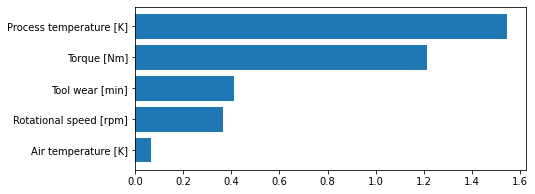

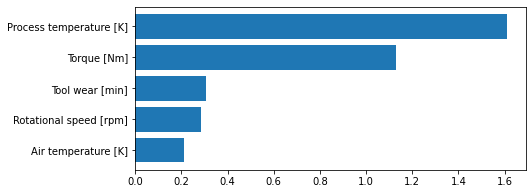

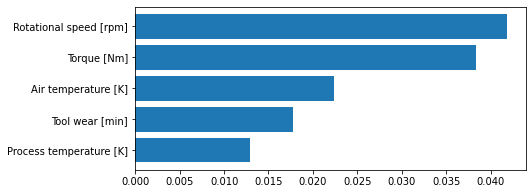

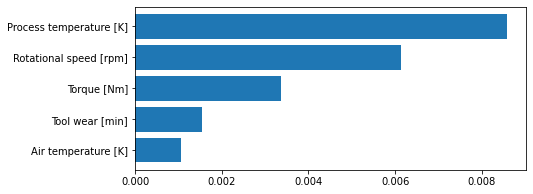

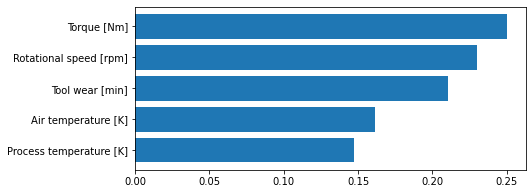

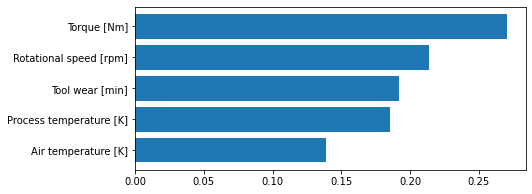

In [37]:
X = XX_df
y = df_RNF['RNF']

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X,y,reg='l2')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_logistic(X,y,reg='l1')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_svm(X,y,reg='l2')
print(d)
print("%s seconds" % d[4])

start_time = time.time()
e = train_svm(X,y,reg='l1')
print(e)
print("%s seconds" % e[4])


start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])

start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % f[4])

In [38]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable for RNF', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
df2.loc[6] = g

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable for RNF,Run Time
0,kNN,0.99788,N_Neighbor = 4,NA,149.668997
1,Logistic (l2),0.99788,C = 1e-08,Process temperature [K],15.704740
2,Logistic (l1),0.99788,C = 1e-08,Process temperature [K],34.818031
3,Linear SVM (l2),0.99788,C = 1e-08,Rotational speed [rpm],76.253664
4,Linear SVM (l1),0.99788,C = 1e-08,Process temperature [K],77.771149
5,Random Forest,0.99788,Max_features = 0.1,Torque [Nm],81.561450
6,Gradient Boosting Method,0.99714,Max_features = 0.3,Torque [Nm],68.469582


In [40]:
cols = ['Machine Failure Mode', 'Top Predictor Variable']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = ['Tool Wear Failure (TWF)', 'Tool wear [min]']
df2.loc[1] = ['Heat Dissipation Failure (HDF)', 'Air temperature [K]']
df2.loc[2] = ['Power Failure (PWF)', 'Torque [Nm]']
df2.loc[3] = ['Overstrain Failure (OSF)', 'Tool wear [min]']
df2.loc[4] = ['Random Failure (RNF)', 'Torque [Nm]']

df2

,Machine Failure Mode,Top Predictor Variable
0,Tool Wear Failure (TWF),Tool wear [min]
1,Heat Dissipation Failure (HDF),Air temperature [K]
2,Power Failure (PWF),Torque [Nm]
3,Overstrain Failure (OSF),Tool wear [min]
4,Random Failure (RNF),Torque [Nm]
